# EDA 

### 데이터 불러오기

In [52]:
import pandas as pd

import warnings
import matplotlib.pyplot as plt
import plotly.express as px

## 모델 평가를 위한 패키지
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import minmax_scale

from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import cross_val_score, cross_validate

import seaborn as sns
import numpy as np


# Read in white wine data 
#white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
white = pd.read_csv("winequality-white.csv", sep=';')

# Read in red wine data 
# red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
red = pd.read_csv("winequality-red.csv", sep=';')

# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

### 값 확인

In [19]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [20]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


<AxesSubplot:>

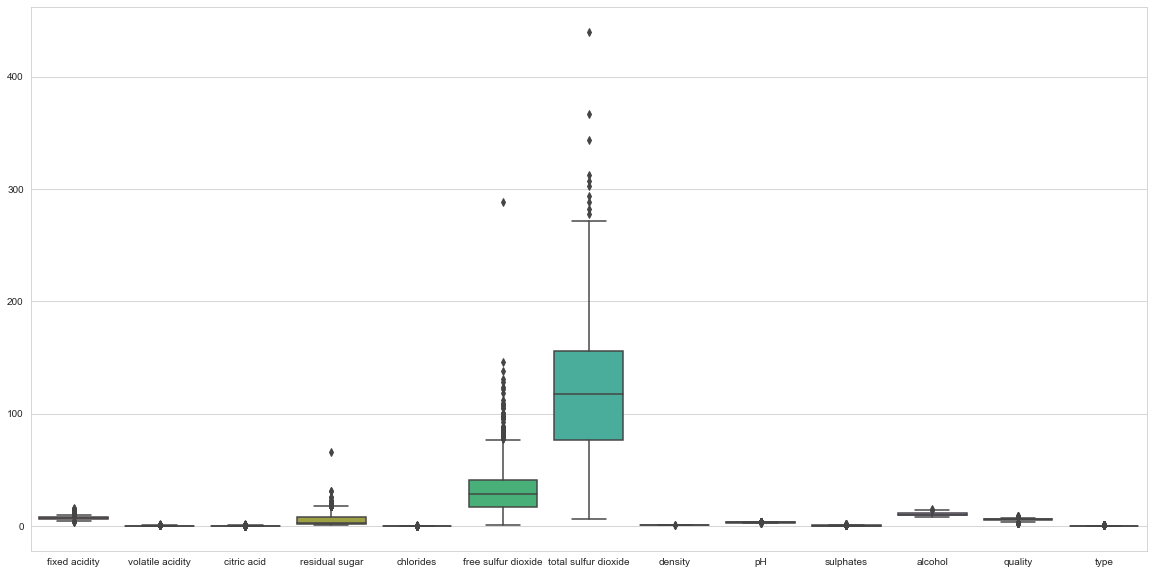

In [21]:
%matplotlib inline
%config Completer.use_jedi = False

plt.rcParams['font.family'] = 'Nanum Gothic'
plt.rcParams["figure.figsize"] = (20,10)

sns.set_style("whitegrid")
sns.boxplot(data = wines) 

### 전처리

<AxesSubplot:>

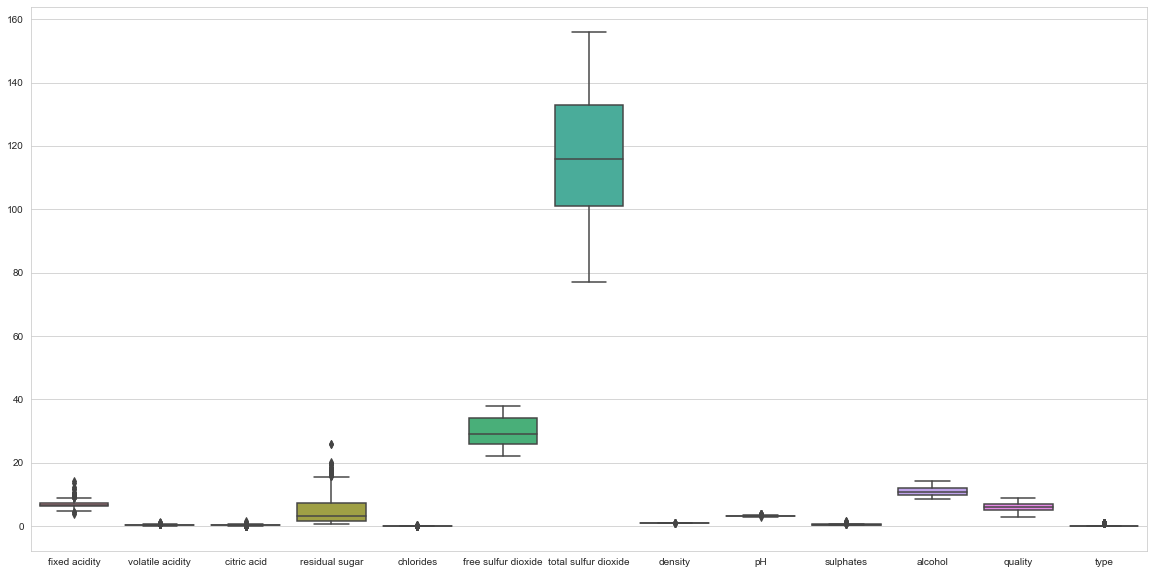

In [22]:
#outlier 제거

column_names_for_remove_outliers = ['total sulfur dioxide','free sulfur dioxide']

for column_name in column_names_for_remove_outliers:
    y = wines[column_name]
    removed_outliers = y.between(y.quantile(.25), y.quantile(.75))
    index_names = wines[~removed_outliers].index
    wines.drop(index_names, inplace=True)

sns.boxplot(data=wines)

In [23]:
wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [24]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670 entries, 16 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1670 non-null   float64
 1   volatile acidity      1670 non-null   float64
 2   citric acid           1670 non-null   float64
 3   residual sugar        1670 non-null   float64
 4   chlorides             1670 non-null   float64
 5   free sulfur dioxide   1670 non-null   float64
 6   total sulfur dioxide  1670 non-null   float64
 7   density               1670 non-null   float64
 8   pH                    1670 non-null   float64
 9   sulphates             1670 non-null   float64
 10  alcohol               1670 non-null   float64
 11  quality               1670 non-null   int64  
 12  type                  1670 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 182.7 KB


In [25]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,1
46,7.7,0.935,0.43,2.2,0.114,22.0,114.0,0.9970,3.25,0.73,9.2,5,1
53,8.6,0.380,0.36,3.0,0.081,30.0,119.0,0.9970,3.20,0.56,9.4,5,1
74,9.7,0.320,0.54,2.5,0.094,28.0,83.0,0.9984,3.28,0.82,9.6,5,1
79,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.9972,3.16,1.12,9.1,4,1


### 결측치 확인

In [26]:
def check_missing_col(dataframe):
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')

        if i == len(dataframe.columns) - 1 and counted_missing_col == 0:
            print('결측치가 존재하지 않습니다')

check_missing_col(wines)

결측치가 존재하지 않습니다


### 정답 레이블 분포 확인

In [28]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,1
46,7.7,0.935,0.43,2.2,0.114,22.0,114.0,0.9970,3.25,0.73,9.2,5,1
53,8.6,0.380,0.36,3.0,0.081,30.0,119.0,0.9970,3.20,0.56,9.4,5,1
74,9.7,0.320,0.54,2.5,0.094,28.0,83.0,0.9984,3.28,0.82,9.6,5,1
79,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.9972,3.16,1.12,9.1,4,1


In [27]:
fig=px.histogram( data_frame = wines,
            x = wines['quality'],
            color = wines['quality'])
fig.show()

### 상관관계 분석

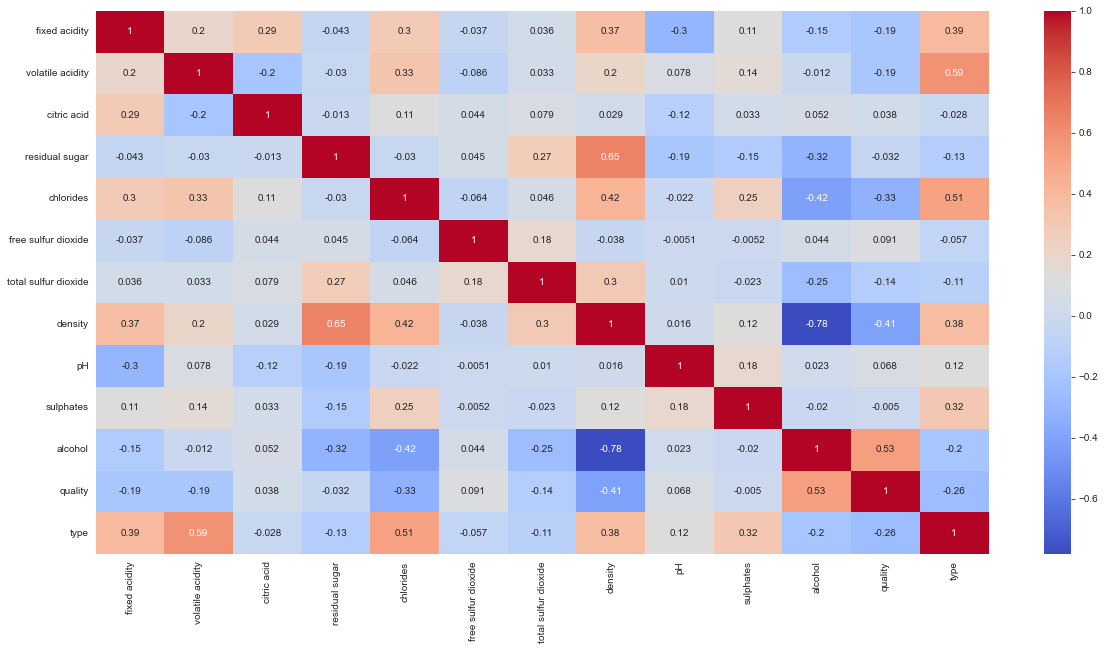

In [29]:
corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap='coolwarm')
plt.show()

### Train 데이터와 Test 데이터로 나누고, 데이터 확인

In [117]:
wines_copy = wines.copy()

# 왜도 조정
def check_skewness(x):
    
    skew_limit = 0.75
    skew_value = wines_copy[wines_copy.columns].skew()
    skew_cols=skew_value[abs(skew_value)>skew_limit]
    #print(skew_cols)
    cols=skew_cols.index
    return cols
    
#skewed_col=check_skewness(wines_copy)
print(skewed_col)

#pt = PowerTransformer(standardize=False)
#wines_copy[skewed_col] = pt.fit_transform(wines_copy[skewed_col])


df1 = wines_copy.pop('type') # remove column b and store it in df1
df2 = wines_copy.pop('quality') # remove column x and store it in df2
wines_copy['type']= df1 # add b series as a 'new' column.
wines_copy['quality']= df2 # add b series as a 'new' column.

# Specify the data 
X = wines_copy.iloc[:,0:-1]  # 12 dimensions

# Specify the target labels and flatten the array 
y = np.ravel(wines_copy.quality)

# Split the data up in train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'sulphates', 'type'],
      dtype='object')


In [120]:
y_train

array([5, 6, 6, ..., 5, 5, 5])

### DecisionTreeClassifier를 이용한 분류

In [31]:
estimator = DecisionTreeClassifier(criterion='gini', max_depth=None, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=1, max_features=None)

estimator.fit(x_train, y_train)

y_predict = estimator.predict(x_train) 
score = metrics.accuracy_score(y_train, y_predict)
print("Train 정확도 : {}%".format(round(score * 100,1))) #1.0

y_predict = estimator.predict(x_test) 
score = metrics.accuracy_score(y_test, y_predict)
print("Test 정확도 : {}%".format(round(score * 100,1))) #1.0

Train 정확도 : 100.0%
Test 정확도 : 62.0%


### 나이브 베이즈를 통한 예측

In [32]:
estimator = GaussianNB()

estimator.fit(x_train, y_train)

y_predict = estimator.predict(x_train) 
score = metrics.accuracy_score(y_train, y_predict)
print("Train 정확도 : {}%".format(round(score * 100,1))) #1.0

y_predict = estimator.predict(x_test) 
score = metrics.accuracy_score(y_test, y_predict)
print("Test 정확도 : {}%".format(round(score * 100,1))) #1.0

Train 정확도 : 50.4%
Test 정확도 : 50.2%


### 나이브 베이즈 모델을 file로 저장하고 불러온다. 

In [33]:
import pickle
import joblib

# 모델을 파일에 저장
naive_model_reuslt_filename = 'naive_model.sav'
pickle.dump(estimator, open(naive_model_reuslt_filename, 'wb'))

# 모델을 불러온다. 
loaded_model = pickle.load(open(naive_model_reuslt_filename, 'rb'))

# accuracy를 구한다.
results = loaded_model.predict(x_train)
score_result = loaded_model.score(x_test, y_test)

print("[PREDICT RESULT] {}".format(results))
print("[ACCURACY] {}%".format(round(score_result*100,1)))


[PREDICT RESULT] [7 7 7 ... 5 5 7]
[ACCURACY] 50.2%


### 앙상블 기법을 이용한 예측

In [34]:
estimator = VotingClassifier(estimators=[('lr', LogisticRegression()),
                                         ('kn', KNeighborsClassifier()),
                                         ('dt', DecisionTreeClassifier())], voting='hard', weights=None)

estimator.fit(x_train, y_train)

y_predict = estimator.predict(x_train) 
score = metrics.accuracy_score(y_train, y_predict)
print("Train 정확도 : {}%".format(round(score * 100,1))) #1.0

y_predict = estimator.predict(x_test) 
score = metrics.accuracy_score(y_test, y_predict)
print("Test 정확도 : {}%".format(round(score * 100,1))) #1.0

Train 정확도 : 78.3%
Test 정확도 : 56.7%


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### 랜덤 포레스트를 이용한 예측

In [35]:
estimator = RandomForestClassifier()

estimator.fit(x_train, y_train)

y_predict = estimator.predict(x_train) 
score = metrics.accuracy_score(y_train, y_predict)
print("Train 정확도 : {}%".format(round(score * 100,1))) #1.0

y_predict = estimator.predict(x_test) 
score = metrics.accuracy_score(y_test, y_predict)
print("Test 정확도 : {}%".format(round(score * 100,1))) #1.0

Train 정확도 : 100.0%
Test 정확도 : 69.7%


In [40]:
y_test

array([8, 7, 7, 6, 6, 5, 8, 5, 7, 8, 7, 6, 6, 8, 7, 6, 6, 7, 5, 7, 4, 5,
       6, 6, 6, 5, 5, 8, 7, 6, 6, 5, 6, 5, 7, 6, 7, 5, 5, 6, 6, 5, 6, 6,
       7, 5, 6, 6, 6, 6, 6, 6, 6, 6, 4, 5, 5, 6, 5, 6, 5, 5, 6, 7, 8, 5,
       5, 6, 7, 6, 5, 7, 5, 6, 7, 8, 6, 6, 7, 6, 6, 5, 5, 7, 5, 6, 6, 6,
       6, 6, 5, 6, 8, 7, 7, 7, 6, 6, 5, 6, 8, 6, 8, 6, 6, 5, 5, 6, 7, 5,
       7, 6, 6, 7, 6, 5, 7, 6, 7, 6, 6, 6, 5, 7, 7, 5, 7, 8, 6, 7, 7, 7,
       4, 6, 6, 5, 5, 5, 6, 6, 6, 5, 7, 5, 6, 5, 5, 6, 7, 6, 7, 6, 5, 7,
       5, 7, 6, 6, 6, 5, 6, 6, 7, 5, 6, 8, 7, 7, 6, 5, 7, 5, 5, 6, 5, 6,
       7, 5, 5, 6, 5, 5, 6, 7, 7, 7, 7, 6, 6, 7, 7, 6, 9, 6, 6, 4, 6, 6,
       7, 6, 5, 7, 7, 7, 7, 6, 6, 7, 6, 7, 6, 7, 6, 5, 7, 7, 4, 6, 6, 8,
       6, 6, 5, 7, 8, 7, 7, 6, 6, 5, 6, 6, 7, 5, 6, 7, 8, 6, 7, 6, 6, 6,
       6, 6, 6, 6, 7, 8, 6, 5, 6, 5, 5, 6, 7, 5, 5, 7, 6, 7, 7, 6, 7, 7,
       7, 7, 7, 6, 6, 5, 7, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 7, 6, 7, 6, 6,
       6, 5, 7, 5, 5, 7, 7, 5, 6, 5, 4, 6, 7, 7, 6,

### 특성 중요도 파악

<AxesSubplot:>

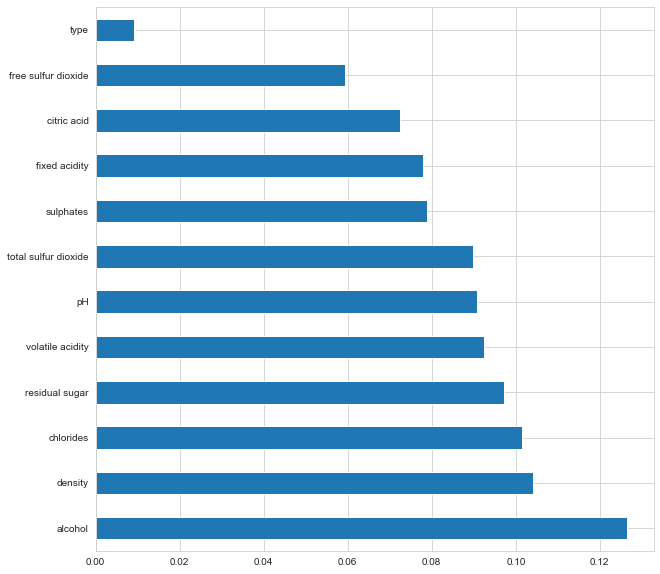

In [36]:
feat_importances = pd.Series(estimator.feature_importances_, index=x_train.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

# 중간 결론

quality의 분포가 5,6,7이 대부분이어서, accuracy가 70% 정도로 정확히 예측하기 어려움.  
따라서 6.5를 기준으로, 정상 혹은 불량품임을 판단하도록 분석 내용 변경 

In [121]:
def qualityToBinary(quality):
    # 6.5 이상이면 정상
    if quality >= 6.5:
        return 1
    # 6.5 미만이면 불량
    else :
        return 0

wine_copied = wines.copy()
#중복 항목 제거
wine_copied = wine_copied.drop_duplicates(keep='first')

wine_copied["quality"] = wine_copied.quality.apply(qualityToBinary)

y = wine_copied.pop("quality")

In [122]:
wine_copied

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0


In [157]:
wine_copied.iloc[:,0:len(wine_copied.columns)-1]  # 12 dimensions

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [163]:
wine_copied.iloc[0:2,:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1


In [164]:
wine_copied.loc[0:2,:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1


In [38]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE()
wine_copied, y = smote.fit_resample(wine_copied,y)

In [39]:
wine_copied.shape

(1998, 12)

In [40]:
y.shape

(1998,)

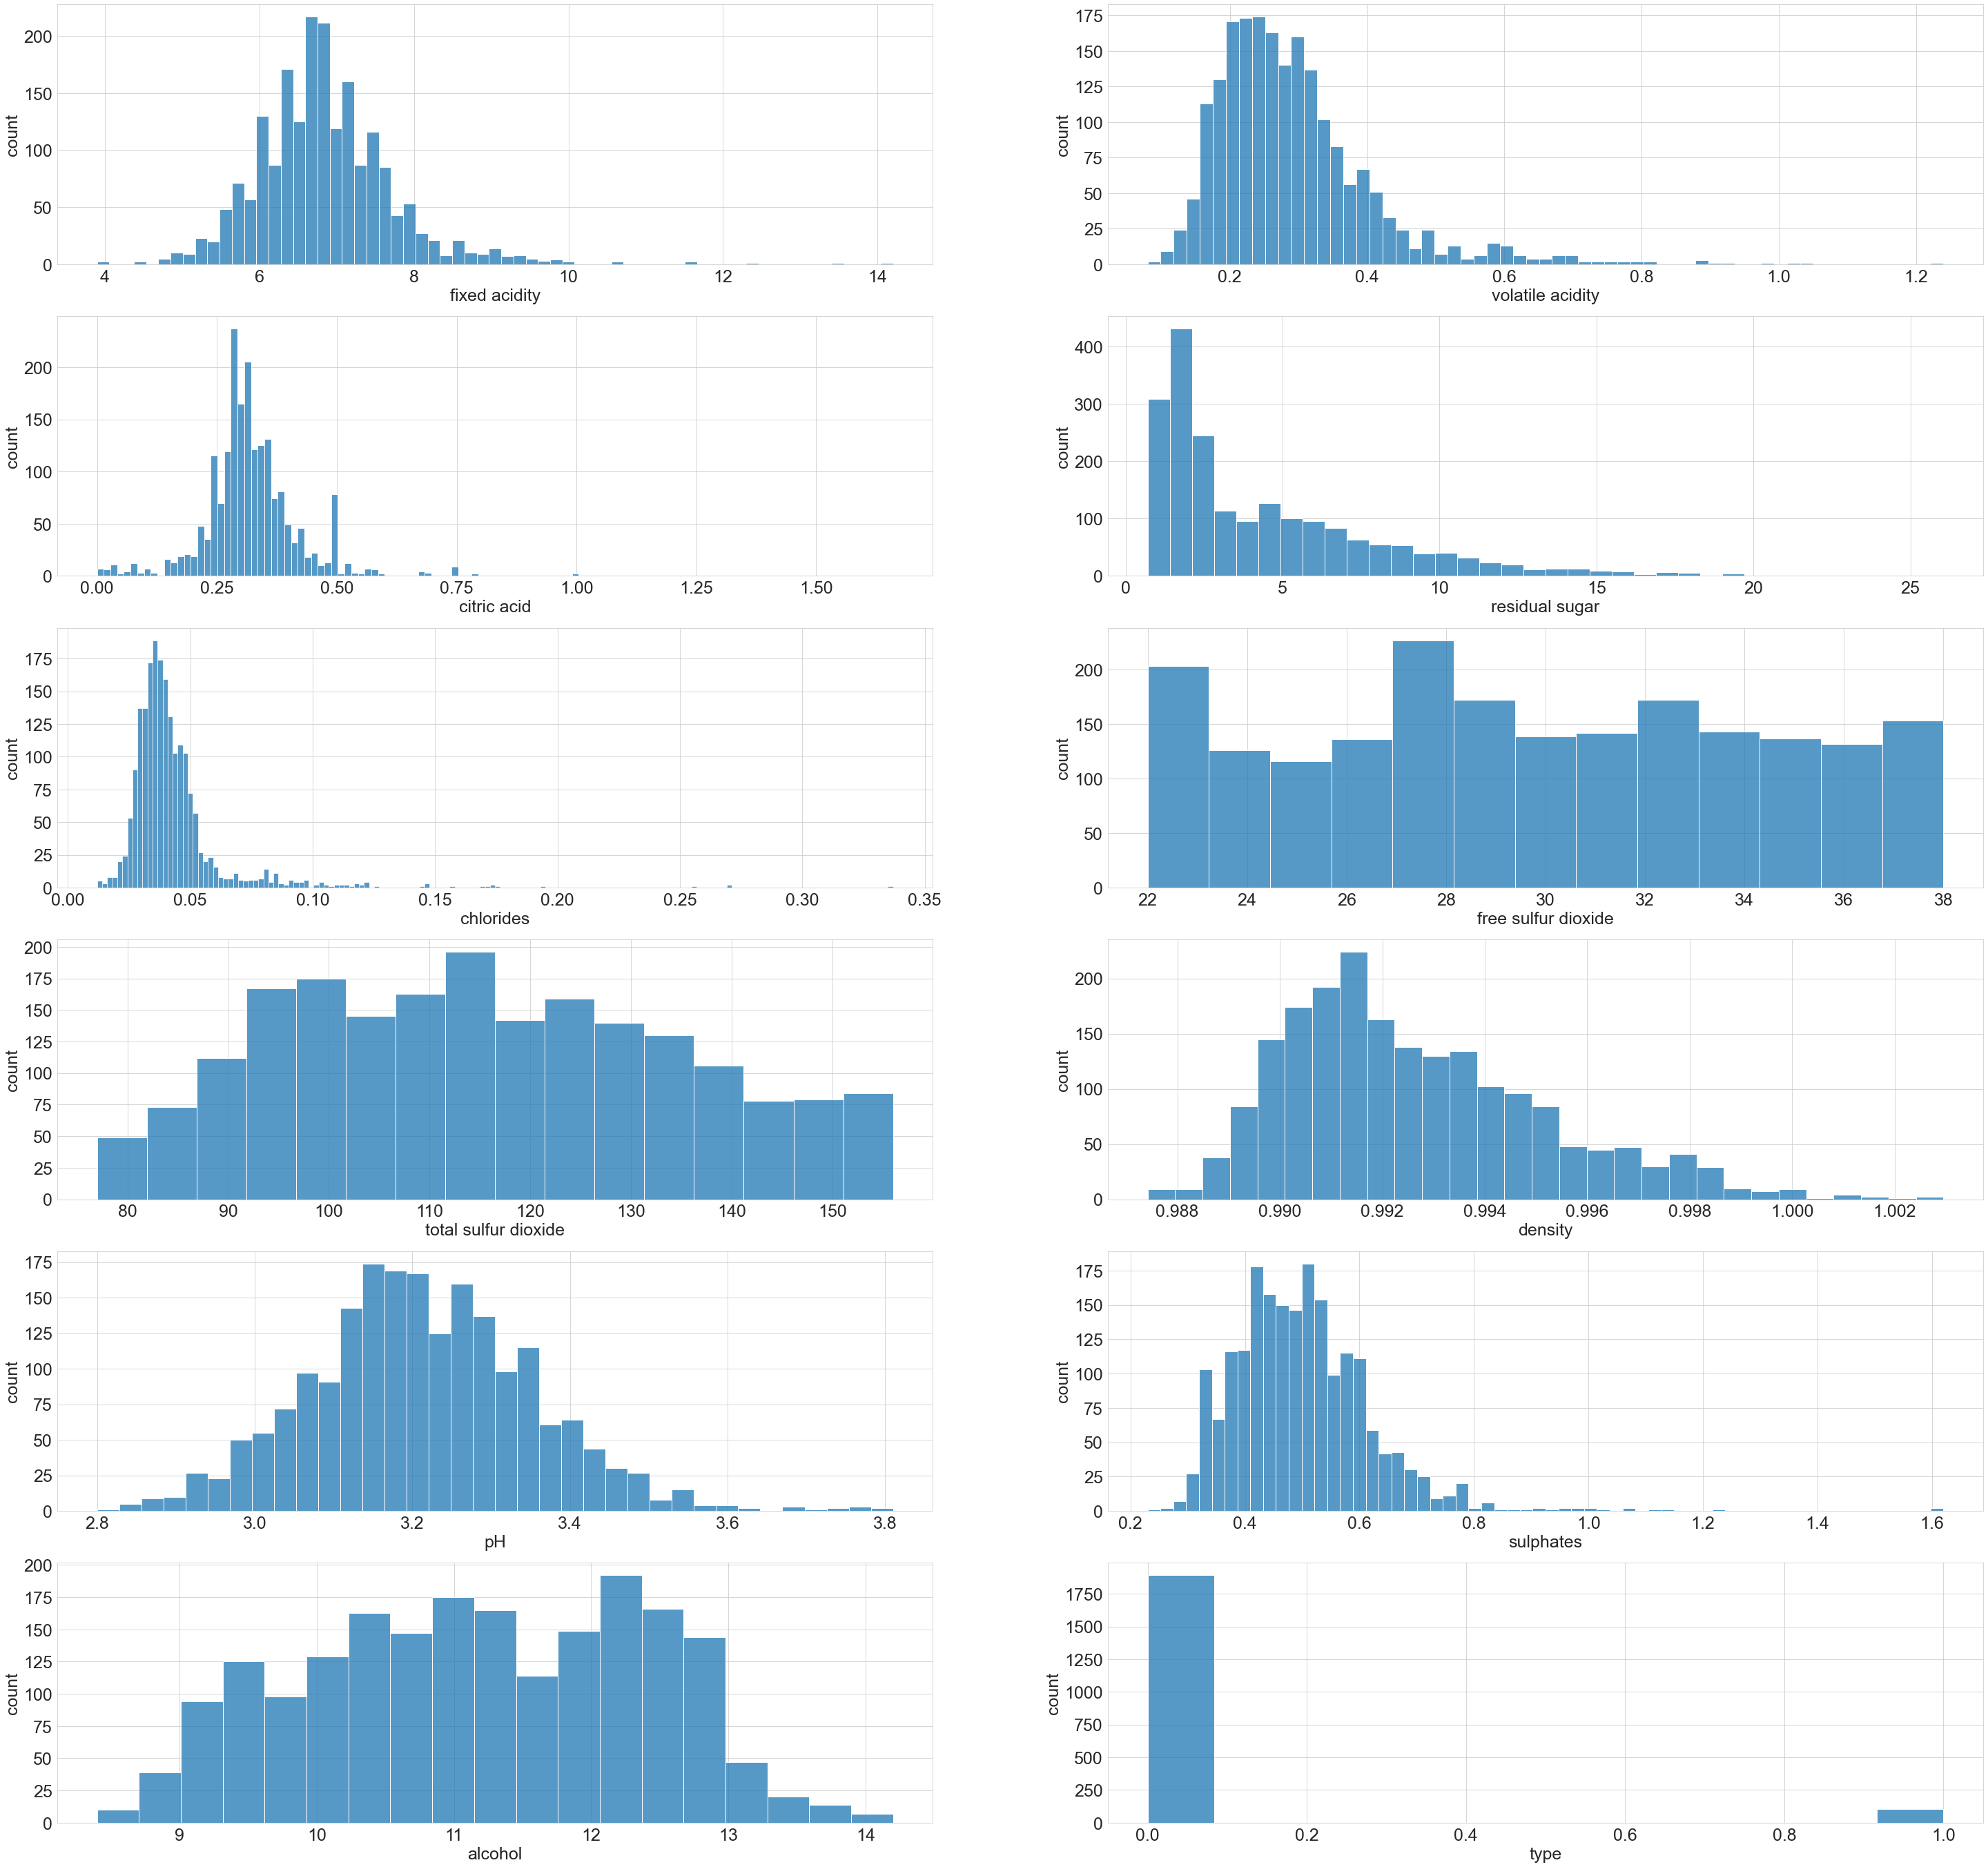

In [41]:
i = 1
plt.figure(figsize=(50,90))

for col in wine_copied.columns:
    plt.subplot(11,2,i)
    sns.histplot(wine_copied[col])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)
    i = i + 1
plt.show()

### 왜도 조정

In [42]:
def check_skewness(x):
    
    skew_limit = 0.75
    skew_value = wine_copied[wine_copied.columns].skew()
    skew_cols=skew_value[abs(skew_value)>skew_limit]
    #print(skew_cols)
    cols=skew_cols.index
    return cols
    
skewed_col=check_skewness(wine_copied)
print(skewed_col)

pt = PowerTransformer(standardize=False)
wine_copied[skewed_col] = pt.fit_transform(wine_copied[skewed_col])

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'density', 'sulphates', 'type'],
      dtype='object')


In [43]:
wine_copied[skewed_col].skew()

fixed acidity      -0.050503
volatile acidity    0.025242
citric acid        -0.098891
residual sugar      0.122550
chlorides           0.036267
density             0.000000
sulphates          -0.008937
type                3.991115
dtype: float64

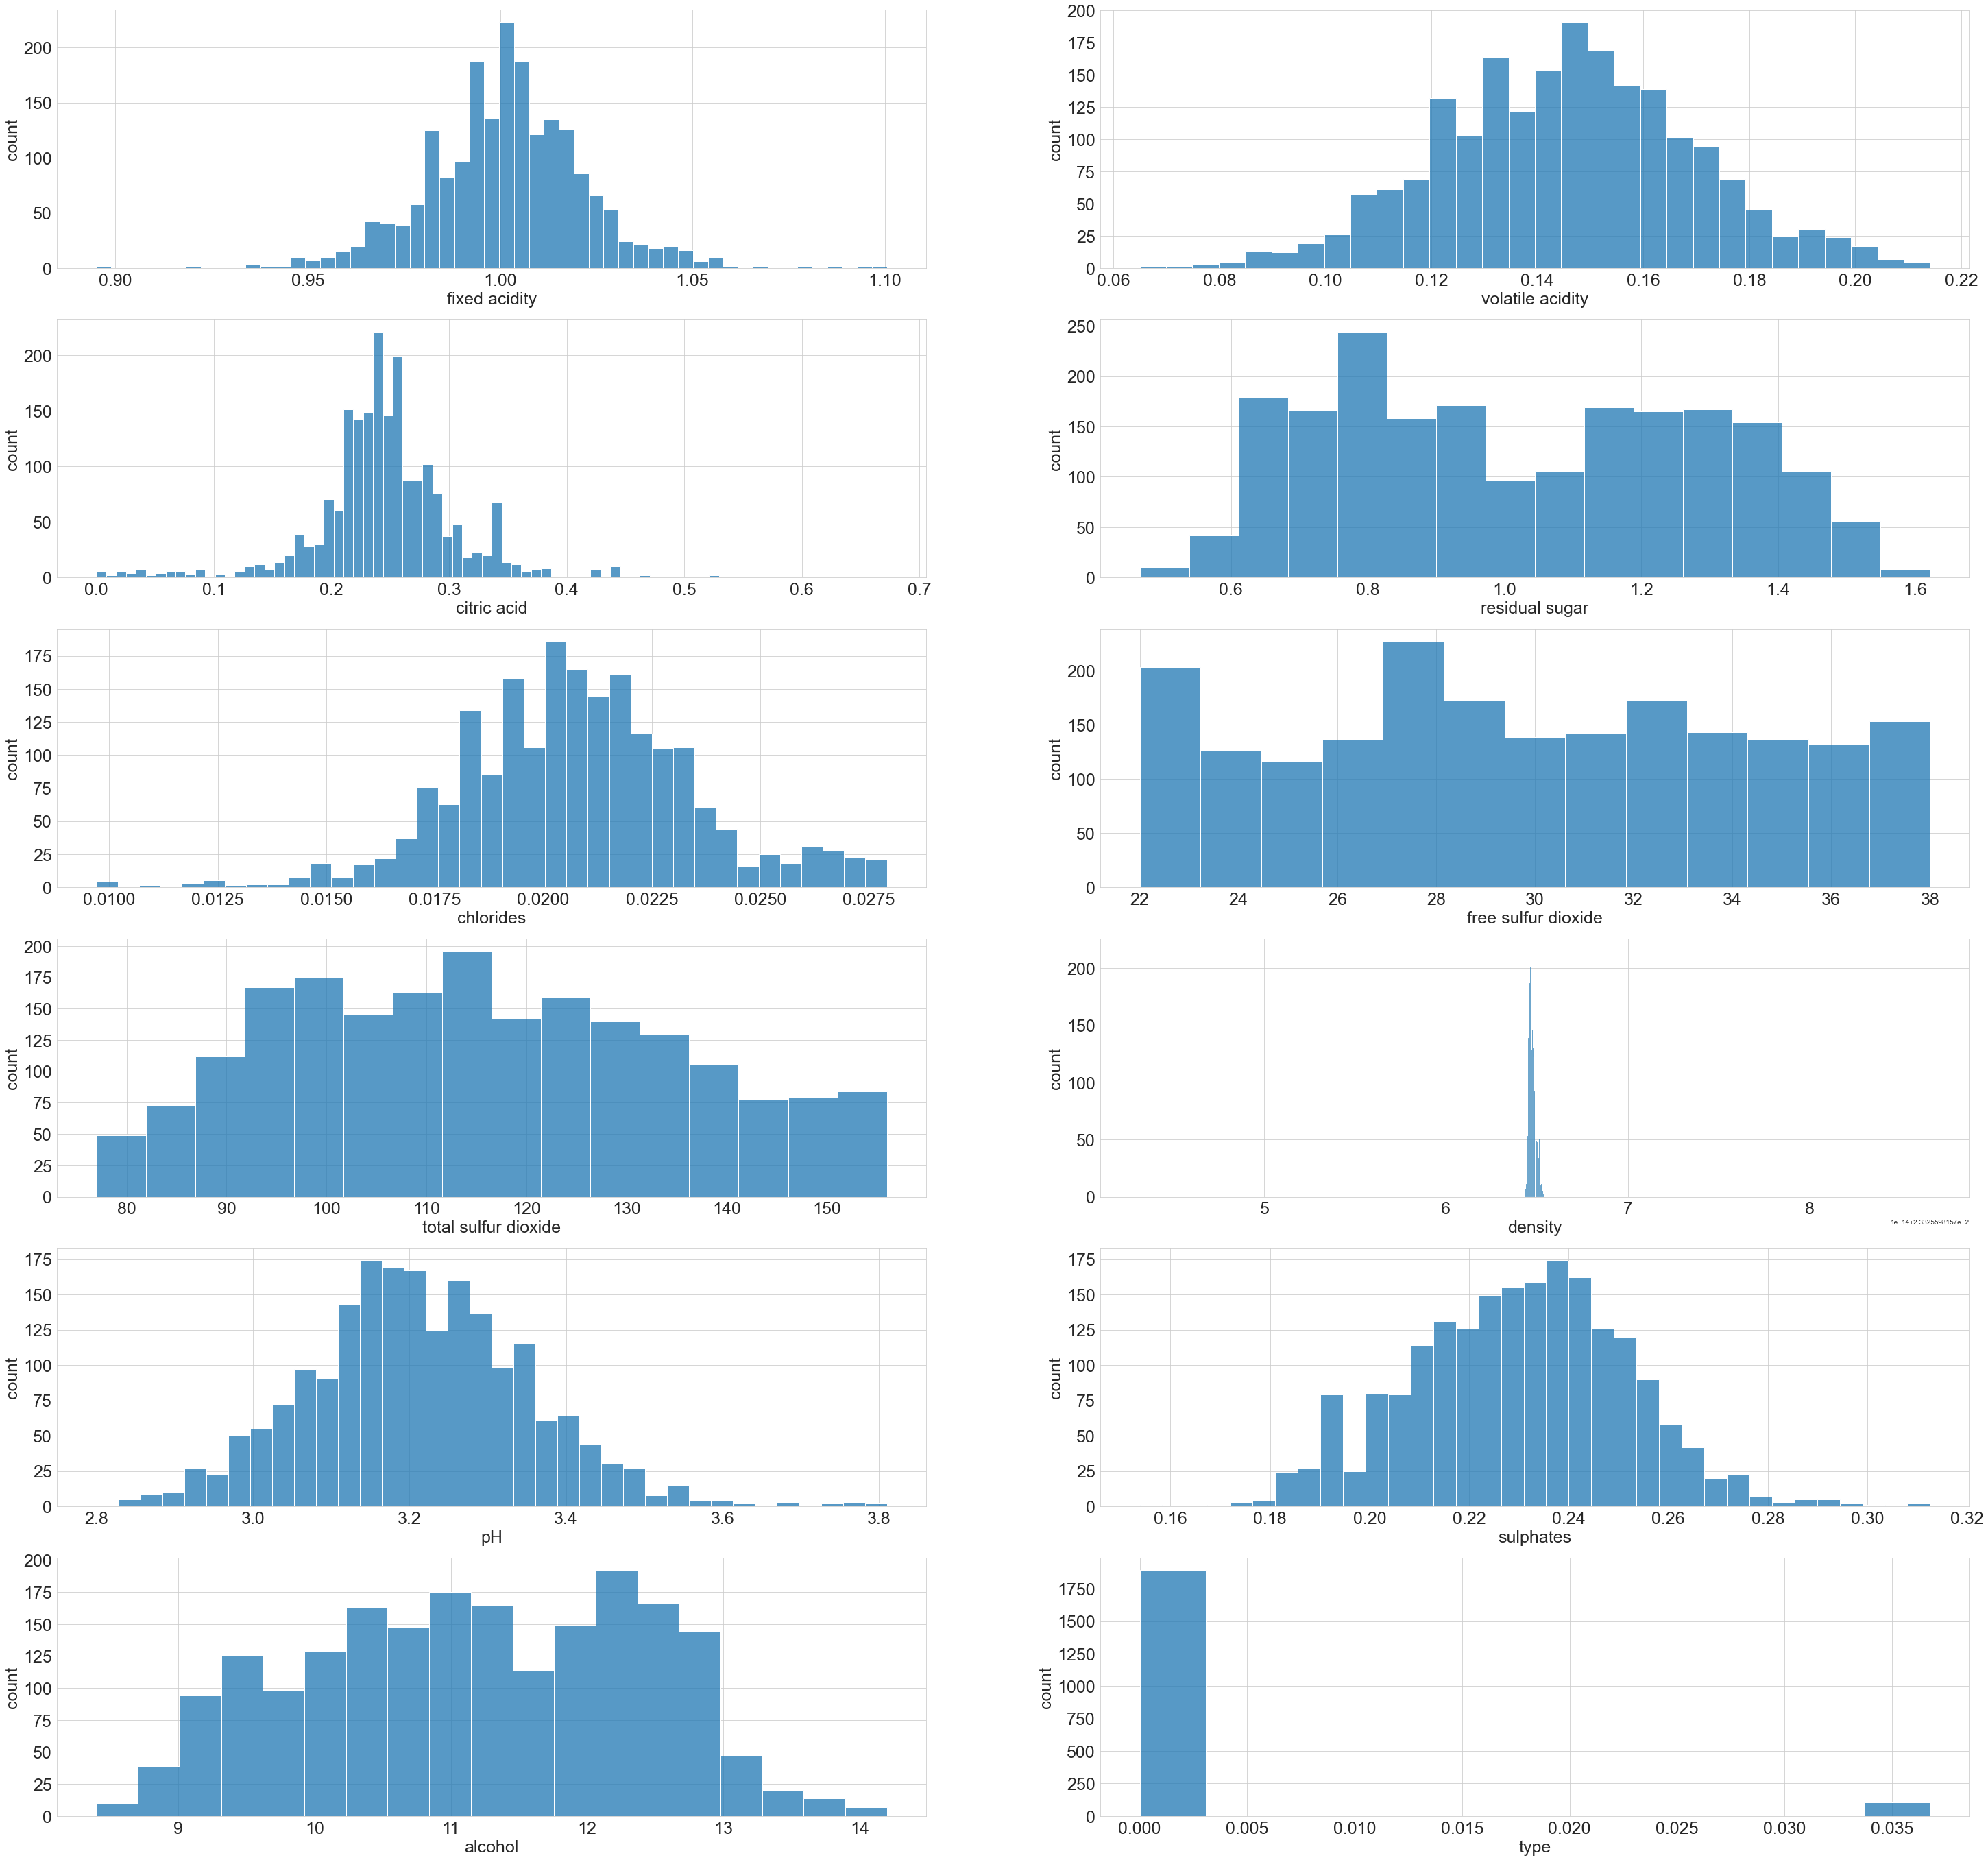

In [44]:
i = 1
plt.figure(figsize=(50,90))

for col in wine_copied.columns:
    plt.subplot(11,2,i)
    sns.histplot(wine_copied[col])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)
    i = i + 1
plt.show()

In [143]:
x_train, x_test, y_train, y_test = train_test_split(wine_copied, y, test_size=0.33, random_state=42)

In [141]:
y_train

4729    0
4525    1
2238    0
3872    0
3115    0
       ..
3672    0
4524    0
6350    0
6393    0
1011    0
Name: quality, Length: 3564, dtype: int64

### 스케일 조정

In [125]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train[:11])
x_test = sc.transform(x_test)

# 스케일 데이터 저장
from joblib import dump, load
dump(sc, 'std_scaler.bin', compress=True)

# 스케일 데이터 로드
sc = load('std_scaler.bin')

In [129]:
x_train[0]

array([-0.38719957, -1.06742034,  0.28570215,  1.60873407, -0.1877669 ,
        1.99178381,  0.95746037,  0.87118137,  1.01484093, -0.46824437,
       -0.88151334, -0.61237244])

### Random Forest

In [62]:
estimator = RandomForestClassifier()

estimator.fit(x_train, y_train)

y_predict = estimator.predict(x_train) 
score = metrics.accuracy_score(y_train, y_predict)
print("Train 정확도 : {}%".format(round(score * 100,1))) #1.0

y_predict = estimator.predict(x_test) 
score = metrics.accuracy_score(y_test, y_predict)
print("Test 정확도 : {}%".format(round(score * 100,1))) #1.0

Train 정확도 : 100.0%
Test 정확도 : 81.1%


In [56]:
import pickle
import joblib

# 모델을 파일에 저장
naive_model_reuslt_filename = 'random_forest_model.sav'
pickle.dump(estimator, open(naive_model_reuslt_filename, 'wb'))

# 모델을 불러온다. 
loaded_model = pickle.load(open(naive_model_reuslt_filename, 'rb'))

# accuracy를 구한다.
results = loaded_model.predict(x_train)
score_result = loaded_model.score(x_test, y_test)

print("[PREDICT RESULT] {}".format(results))
print("[ACCURACY] {}%".format(round(score_result*100,1)))

[PREDICT RESULT] [1 1 0 ... 0 1 0]
[ACCURACY] 78.0%


### Grid Search를 이용하여 파라미터 최적화 실시

In [57]:
from sklearn.model_selection import GridSearchCV
svm2 = SVC()
grid = {
    'C': [1, 2, 3, 4, 5, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.5, 1, 0.1, 0.01, 0.001, 0.0001]
    
}

svm_grid = GridSearchCV(estimator = svm2, param_grid = grid, cv = 3, n_jobs = -1)
svm_grid.fit(x_train,y_train)

KeyboardInterrupt: 

In [56]:
svm_grid.best_params_

{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}

In [57]:
svm_grid.score(x_train,y_train)

0.9753363228699552

In [58]:
svm_grid.score(x_test,y_test)

0.8621212121212121

In [ ]:
# MNIST 데이터 관련 import from keras.datasets import mnist # MNIST 데이터 Loader from keras.utils.np_utils import to_categorical # One-hot 포맷 변환 import numpy as np # float type casting # Feature scaling 관련 import from sklearn.preprocessing import minmax_scale # [0-1] Scaling # Model 구축 관련 import from keras.models import Sequential from keras.layers import Dense, Dropout, Activation from keras.optimizers import adam

출처: https://iostream.tistory.com/111 [Almost Baseball, CSE and Diary]

In [144]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation 
from sklearn.preprocessing import minmax_scale
from keras.utils.np_utils import to_categorical


def build_model():
    model = Sequential()   
    model.add(Dense(100, input_dim = 12, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation="softmax"))
    
    return model

model = build_model()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Start Training
training_epochs = 15
batch_size = 20
model.fit(x_train, y_train, epochs=training_epochs, batch_size=200)


Epoch 1/15
18/18 [==============================] - 0s 998us/step - loss: 7.0310 - accuracy: 0.1863
Epoch 2/15
18/18 [==============================] - 0s 1ms/step - loss: 1.7899 - accuracy: 0.1863
Epoch 3/15
18/18 [==============================] - 0s 1ms/step - loss: 0.7433 - accuracy: 0.1863
Epoch 4/15
18/18 [==============================] - 0s 1ms/step - loss: 0.5637 - accuracy: 0.1863
Epoch 5/15
18/18 [==============================] - 0s 1ms/step - loss: 0.4712 - accuracy: 0.1863
Epoch 6/15
18/18 [==============================] - 0s 1ms/step - loss: 0.4588 - accuracy: 0.1863
Epoch 7/15
18/18 [==============================] - 0s 1ms/step - loss: 0.4529 - accuracy: 0.1863
Epoch 8/15
18/18 [==============================] - 0s 1ms/step - loss: 0.4491 - accuracy: 0.1863
Epoch 9/15
18/18 [==============================] - 0s 1ms/step - loss: 0.4473 - accuracy: 0.1863
Epoch 10/15
18/18 [==============================] - 0s 1ms/step - loss: 0.4449 - accuracy: 0.1863
Epoch 11/15
18/18

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
4729,6.5,0.330,0.38,2.5,0.047,30.0,148.0,0.98964,3.17,0.43,12.7,0
4525,5.2,0.155,0.33,1.6,0.028,13.0,59.0,0.98975,3.30,0.84,11.9,0
2238,5.8,0.335,0.14,5.8,0.046,49.0,197.0,0.99370,3.30,0.71,10.3,0
3872,6.1,0.460,0.32,6.2,0.053,10.0,94.0,0.99537,3.35,0.47,10.1,0
3115,8.2,0.220,0.49,9.6,0.037,53.0,154.0,0.99510,3.02,0.33,10.6,0
3300,7.9,0.290,0.36,11.1,0.033,43.0,208.0,0.99690,3.14,0.46,10.3,0
3676,7.0,0.220,0.39,2.1,0.055,39.0,198.0,0.99510,3.52,0.54,10.2,0
3271,6.6,0.260,0.31,4.8,0.138,41.0,168.0,0.99510,3.20,0.38,9.3,0
197,11.5,0.300,0.60,2.0,0.067,12.0,27.0,0.99810,3.11,0.97,10.1,1
2759,7.5,0.140,0.34,1.3,0.055,50.0,153.0,0.99450,3.29,0.80,9.6,0


In [139]:
y_train

array([[[[1., 0.],
         [0., 1.]],

        [[0., 1.],
         [1., 0.]]],


       [[[0., 1.],
         [1., 0.]],

        [[1., 0.],
         [0., 1.]]],


       [[[1., 0.],
         [0., 1.]],

        [[0., 1.],
         [1., 0.]]],


       ...,


       [[[1., 0.],
         [0., 1.]],

        [[0., 1.],
         [1., 0.]]],


       [[[1., 0.],
         [0., 1.]],

        [[0., 1.],
         [1., 0.]]],


       [[[1., 0.],
         [0., 1.]],

        [[0., 1.],
         [1., 0.]]]], dtype=float32)

In [124]:
y_train

array([5, 6, 6, ..., 5, 5, 5])

In [108]:
y_train

array([5, 6, 6, ..., 5, 5, 5])

In [95]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
1700,0.590442,0.091476,0.32,1.484448,0.030332,11.860017,162.0,0.99620,3.40,0.211818,9.4,-0.000000
5199,0.589178,0.091476,0.30,1.577389,0.028853,8.238824,88.0,0.99654,3.20,0.195699,9.9,-0.000000
3340,0.592630,0.182795,0.40,0.876039,0.024929,7.661950,152.0,0.99060,3.18,0.186482,12.9,-0.000000
86,0.595255,0.201498,0.28,0.854722,0.039178,6.355199,136.0,0.99720,2.93,0.312559,9.9,0.183843
5587,0.585668,0.130212,0.17,0.783914,0.028537,9.994398,129.0,0.99100,3.30,0.216592,11.4,-0.000000


In [83]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 24)                312       
                                                                 
 dense_9 (Dense)             (None, 10)                250       
                                                                 
 dense_10 (Dense)            (None, 2)                 22        
                                                                 
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________
